## DSGE.jl example

** Sev **

### Getting impulse response

Notice here in order to get irf, one needs to specify four items:

output_vars: can specify ":irfstates", which contains endogenous states including $y_t$, $c_t$, etc. Or ":irfobs", which contains output growth, inflation and nominal interest rate.

class: this corresponds to what you put in output_var, if it's "irfstates", you need class ":states", for "irfobs", you need ":obs", etc.

"read_forecast_output" function: then you need to change the corresponding part in this function, according to what you put in "output_var", just use the same key word as in "output_var".

"var_v" vector: you need specify corresponding key word for the variable. To see there code book, run: "m.endogenous_states" for states, "m.observables" for obs, "m.exogenous_shocks" for shocks.

If you want to see other shocks, you need to change the "shock" input as well.

### Changing parameters

I constructed one item called: "para", which stores their original parameters, which contains 16 values.

To change the parameter value, you can change the corresponding element in the item "para", to check the ordering of the parameters, type "m.parameters", you will see a thourough description.

After get new parameter vector "para", type "update!(m,para)", the model will take the new parameter and recompute the steady states etc, then run the rest of the code.

If for any other information you need, you can look up in:
http://frbny-dsge.github.io/DSGE.jl/latest/index.html

Start time: 2018-04-03T13:57:15.202
Forecast outputs will be saved in save/DSGE_exp/output_data/an_schorfheide/ss0/forecast/raw
Loading draws from 

Total time to forecast: 0.00020494121666666667 minutes

Forecast complete: 2018-04-03T13:57:15.214
m.exogenous_shocks = DataStructures.OrderedDict(:z_sh=>1,:g_sh=>2,:rm_sh=>3)
m.observables = DataStructures.OrderedDict(:obs_gdp=>1,:obs_cpi=>2,:obs_nominalrate=>3)
m.endogenous_states = DataStructures.OrderedDict(:y_t=>1,:π_t=>2,:R_t=>3,:y_t1=>4,:g_t=>5,:z_t=>6,:Ey_t1=>7,:Eπ_t1=>8)


INFO: Forecasting input_type = init, cond_type = none...


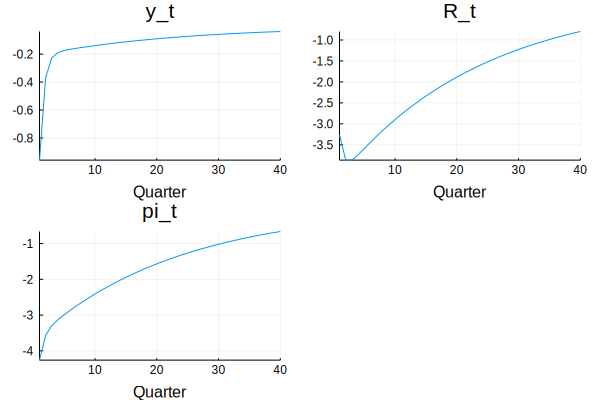

In [64]:
#Pkg.free("DSGE")
#Pkg.update("DSGE")
using DSGE, Plots

# Initialize model
m = AnSchorfheide()
m <= Setting(:saveroot, "save/DSGE_exp")

# # Comment back in to use your own parameters
# This is the original parameters, want to check which is which, type: m.parameters
# para= [1.99,0.73,1.14,0.45,0.03,8.15,1.5,0.38,0.38,0.96,0.49,1.46,0.92,0.116,0.294,0.447];
# para[1]=3.0; # this is example where you change the first parameter
# update!(m, para)

# Compute impulse response functions for observables
input_type  = :init     # use initial parameters
cond_type   = :none     # don't condition on any nowcasts (not relevant for IRFs anyway)
output_vars = [:irfstates]
forecast_one(m, input_type, cond_type, output_vars)

# List shock and observable names
@show m.exogenous_shocks
@show m.observables
@show m.endogenous_states

# Plot response of GDP growth to monetary policy shock
gr() # use GR backend for Plots.jl
#var_v=[:obs_gdp,:obs_cpi,:obs_nominalrate]
var_v=[:y_t,:R_t,:π_t]

p=[]
for i=1:3
    shock     = :z_sh
    var       = var_v[i]
    class     = :states
    series, _ = read_forecast_output(m, input_type, cond_type, :irfstates, var, Nullable(shock))
    title     = DSGE.describe_series(m, var, class, detexify = typeof(Plots.backend()) == Plots.GRBackend)

    pp=plot(vec(series), label = "", xlabel = "Quarter", title = title)
    push!(p,pp)
end
plot(p[1],p[2],p[3])

In [11]:
m.endogenous_states

DataStructures.OrderedDict{Symbol,Int64} with 8 entries:
  :y_t   => 1
  :π_t   => 2
  :R_t   => 3
  :y_t1  => 4
  :g_t   => 5
  :z_t   => 6
  :Ey_t1 => 7
  :Eπ_t1 => 8

In [25]:
m.observables

DataStructures.OrderedDict{Symbol,Int64} with 3 entries:
  :obs_gdp         => 1
  :obs_cpi         => 2
  :obs_nominalrate => 3

In [65]:
m.parameters

16-element Array{DSGE.AbstractParameter{Float64},1}:
 DSGE.UnscaledParameter{Float64,DSGE.Exponential}
(:τ)
τ: The inverse of the intemporal elasticity of substitution.
LaTeX label: \tau
-----------------------------
unscaled, untransformed value:        +1.993700
prior distribution:
	Distributions.Gamma{Float64}(α=16.0, θ=0.125)
transformation for csminwel:
	x -> b + (1/c) * log(x-a)
parameter is not fixed
                                                                 
 DSGE.UnscaledParameter{Float64,DSGE.SquareRoot}
(:κ)
κ: Composite parameter in New Keynesian Phillips Curve.
LaTeX label: \kappa
-----------------------------
unscaled, untransformed value:        +0.730600
prior distribution:
	Distributions.Uniform{Float64}(a=0.0, b=1.0)
transformation for csminwel:
	x -> (a+b)/2 + (b-a)/2*c*x/sqrt(1 + c^2 * x^2)
parameter is not fixed
                                                 
 DSGE.UnscaledParameter{Float64,DSGE.Exponential}
(:ψ_1)
ψ_1: The weight on inflation in the moneta